In [1]:
import pandas as pd
import numpy as np

print("✅ Notebook is working correctly!")

✅ Notebook is working correctly!


In [2]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)

print("✅ Libraries imported successfully!")


Matplotlib is building the font cache; this may take a moment.


✅ Libraries imported successfully!


In [3]:
# Simulate example security log data
np.random.seed(42)

n_samples = 5000
data = pd.DataFrame({
    "login_attempts": np.random.poisson(3, n_samples),
    "failed_logins": np.random.poisson(1, n_samples),
    "data_transferred_MB": np.random.normal(50, 10, n_samples),
    "session_duration_min": np.random.normal(20, 5, n_samples),
    "threat_flag": np.random.choice([0, 1], size=n_samples, p=[0.98, 0.02]) # 2% anomalies
})

data.head()

,login_attempts,failed_logins,data_transferred_MB,session_duration_min,threat_flag
0,4,2,58.566919,9.428764,0
1,1,2,67.960442,20.686994,0
2,3,1,36.698105,26.560312,0
3,3,2,62.635130,13.292971,0
4,2,2,45.222963,20.748664,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   login_attempts        5000 non-null   int64  
 1   failed_logins         5000 non-null   int64  
 2   data_transferred_MB   5000 non-null   float64
 3   session_duration_min  5000 non-null   float64
 4   threat_flag           5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None

Summary statistics:
       login_attempts  failed_logins  data_transferred_MB  \
count     5000.000000    5000.000000          5000.000000   
mean         2.985000       0.997400            49.943519   
std          1.725506       0.998796             9.817101   
min          0.000000       0.000000            15.049548   
25%          2.000000       0.000000            43.162163   
50%          3.000000       1.000000            50.063995   
75%          4.000000       2.00

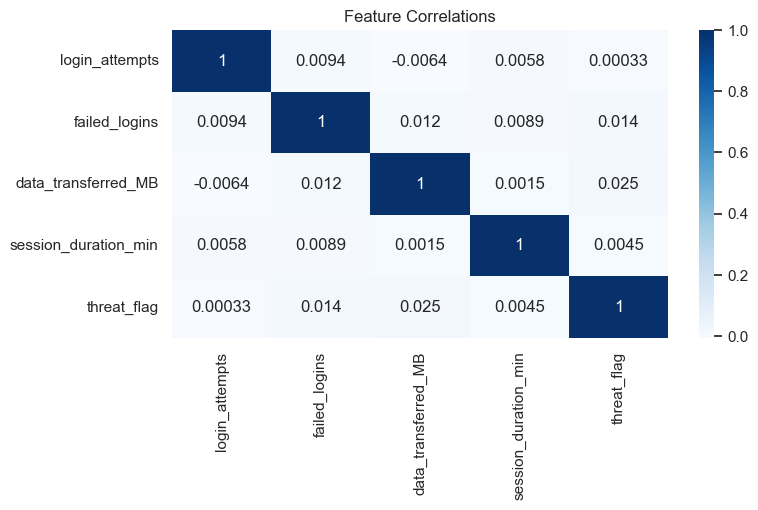

In [4]:
# Check data info
print(data.info())
print("\nSummary statistics:")
print(data.describe())

# Visualize correlations
sns.heatmap(data.corr(), annot=True, cmap="Blues")
plt.title("Feature Correlations")
plt.show()

In [5]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=["threat_flag"]))

# Train Isolation Forest
model = IsolationForest(contamination=0.02, random_state=42)
data["anomaly_score"] = model.fit_predict(X_scaled)

# Compare with actual threat flag
pd.crosstab(data["threat_flag"], data["anomaly_score"], rownames=["Actual"], colnames=["Predicted"])

Predicted,-1,1
Actual,,
0,99,4809
1,1,91


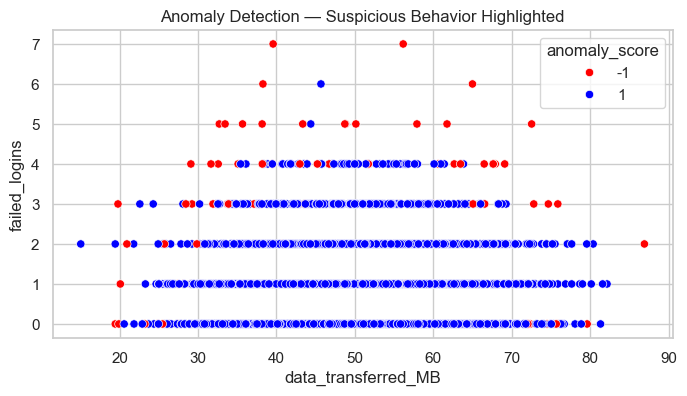

In [6]:
sns.scatterplot(
    x=data["data_transferred_MB"],
    y=data["failed_logins"],
    hue=data["anomaly_score"],
    palette={1: "blue", -1: "red"}
)
plt.title("Anomaly Detection — Suspicious Behavior Highlighted")
plt.show()

In [7]:
data.to_csv("../data/threat_detection_results.csv", index=False)
print("✅ Results saved in /data folder")

✅ Results saved in /data folder
